In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cars = pd.read_csv('H:\Desktop\samochody1tys.csv')
cars

,id,marka,model,rok_produkcji,rodzaj_silnika,pojemnosc_silnika,przebieg,cena,wojewodztwo
0,0,Nissan,X-Trail III,2014.0,Diesel,1600.0,160000.0,75900.0,Dolnośląskie
1,1,BMW,X1 E84,2012.0,Diesel,2000.0,149000.0,70900.0,Świętokrzyskie
2,2,Opel,Zafira A,2004.0,Benzyna+CNG,1600.0,99000.0,9800.0,Opolskie
3,3,Hyundai,i10 I,2008.0,Benzyna,1100.0,93000.0,11900.0,Łódzkie
4,4,Volkswagen,CC,2010.0,Diesel,1968.0,127428.0,49900.0,Wielkopolskie
...,...,...,...,...,...,...,...,...,...
995,995,Alfa Romeo,159,2009.0,Diesel,2387.0,182000.0,33900.0,Małopolskie
996,996,Škoda,Fabia II,2012.0,Benzyna,1200.0,42700.0,25400.0,Lubelskie
997,997,Renault,Modus,2004.0,Benzyna,1200.0,168111.0,10900.0,Łódzkie
998,998,Audi,A3 8L,2000.0,Benzyna,1595.0,226500.0,5400.0,Małopolskie


In [39]:
#1 Tworzę DataFrame df, w której zapisuję samochody z Podkarpacia
df = pd.DataFrame(data = cars[cars["wojewodztwo"]=='Podkarpackie'])
df.head(5)

,id,marka,model,rok_produkcji,rodzaj_silnika,pojemnosc_silnika,przebieg,cena,wojewodztwo
56,56,Opel,Insignia A,2014.0,Diesel,2000.0,80400.0,61900.0,Podkarpackie
86,86,Opel,Vectra C,2007.0,Benzyna,2200.0,219000.0,15900.0,Podkarpackie
90,90,Opel,Meriva I,2008.0,Benzyna,1364.0,184025.0,15900.0,Podkarpackie
110,110,Volkswagen,Touran I,2005.0,Diesel,1900.0,211000.0,15500.0,Podkarpackie
125,125,Citroën,C4 Grand Picasso II,2014.0,Diesel,1990.0,178000.0,50000.0,Podkarpackie


In [37]:
#2 Średnia cena samochodu na Podkarpaciu
df["cena"].mean()

49571.25

In [38]:
#3 Dane dotyczące kolumny "marka"
df["marka"].describe()

count       36
unique      13
top       Opel
freq        10
Name: marka, dtype: object

In [44]:
#4 Średni przebieg samochodów wg roku produkcji
df.groupby("rok_produkcji")["przebieg"].mean()

rok_produkcji
1986.0     89000.000000
2000.0    186500.000000
2001.0    178524.000000
2002.0    272250.000000
2004.0    196251.333333
2005.0    211000.000000
2006.0    169405.600000
2007.0    189500.000000
2008.0    142709.750000
2009.0    267000.000000
2010.0    168500.000000
2011.0    130000.000000
2014.0    122952.000000
2015.0    164000.000000
2016.0      3526.666667
2017.0         5.750000
Name: przebieg, dtype: float64

In [58]:
#5 Ilość samochodów danej marki
df["marka"].value_counts()

Opel             10
Audi              5
Ford              4
Peugeot           3
BMW               3
Volkswagen        3
Seat              2
Mercedes-Benz     1
Citroën           1
Fiat              1
Jeep              1
Toyota            1
Dodge             1
Name: marka, dtype: int64

In [106]:
#6 Nowa kolumna zawierająca stosunek ceny do przebiegu
df['cena_do_przebiegu'] = df.cena/df.przebieg
df.head(5)

,id,marka,model,rok_produkcji,rodzaj_silnika,pojemnosc_silnika,przebieg,cena,wojewodztwo,cena_do_przebiegu
56,56,Opel,Insignia A,2014.0,Diesel,2000.0,80400.0,61900.0,Podkarpackie,0.769900
86,86,Opel,Vectra C,2007.0,Benzyna,2200.0,219000.0,15900.0,Podkarpackie,0.072603
90,90,Opel,Meriva I,2008.0,Benzyna,1364.0,184025.0,15900.0,Podkarpackie,0.086401
110,110,Volkswagen,Touran I,2005.0,Diesel,1900.0,211000.0,15500.0,Podkarpackie,0.073460
125,125,Citroën,C4 Grand Picasso II,2014.0,Diesel,1990.0,178000.0,50000.0,Podkarpackie,0.280899


<AxesSubplot:xlabel='rok_produkcji', ylabel='cena'>

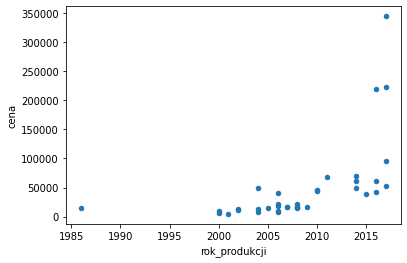

In [78]:
#7 Wykres punktowy mapujący samochody wg ceny i roku produkcji
df.plot.scatter(x='rok_produkcji',y='cena')

In [109]:
#8 Nowa kolumna przedzial_cenowy opisująca przedział cenowy samochodu
df['przedzial_cenowy'] = pd.cut(x=df['cena'], bins=(0,25000,70000,500000), labels=('tani', 'średni', 'drogi'))
df.head(5)

,id,marka,model,rok_produkcji,rodzaj_silnika,pojemnosc_silnika,przebieg,cena,wojewodztwo,cena_do_przebiegu,przedzial_cenowy
56,56,Opel,Insignia A,2014.0,Diesel,2000.0,80400.0,61900.0,Podkarpackie,0.769900,średni
86,86,Opel,Vectra C,2007.0,Benzyna,2200.0,219000.0,15900.0,Podkarpackie,0.072603,tani
90,90,Opel,Meriva I,2008.0,Benzyna,1364.0,184025.0,15900.0,Podkarpackie,0.086401,tani
110,110,Volkswagen,Touran I,2005.0,Diesel,1900.0,211000.0,15500.0,Podkarpackie,0.073460,tani
125,125,Citroën,C4 Grand Picasso II,2014.0,Diesel,1990.0,178000.0,50000.0,Podkarpackie,0.280899,średni


<AxesSubplot:>

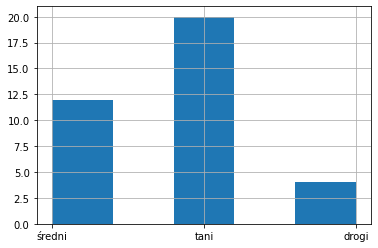

In [82]:
#9 Histogram przedstawiający ilość samochodów w zależności od przedziału cenowego
df["przedzial_cenowy"].hist(bins=5)

In [111]:
#10 Usuwam dodane wczesniej kolumny przedzial_cenowy i cena_do_przebiegu
df.drop(["przedzial_cenowy","cena_do_przebiegu"],axis=1, inplace=True)
df.head(5)

,id,marka,model,rok_produkcji,rodzaj_silnika,pojemnosc_silnika,przebieg,cena,wojewodztwo
56,56,Opel,Insignia A,2014.0,Diesel,2000.0,80400.0,61900.0,Podkarpackie
86,86,Opel,Vectra C,2007.0,Benzyna,2200.0,219000.0,15900.0,Podkarpackie
90,90,Opel,Meriva I,2008.0,Benzyna,1364.0,184025.0,15900.0,Podkarpackie
110,110,Volkswagen,Touran I,2005.0,Diesel,1900.0,211000.0,15500.0,Podkarpackie
125,125,Citroën,C4 Grand Picasso II,2014.0,Diesel,1990.0,178000.0,50000.0,Podkarpackie
